In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
from matplotlib.gridspec import SubplotSpec


In [2]:
def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
    "Sign sets of subplots with title"
    row = fig.add_subplot(grid)
    # the '\n' is important
    row.set_title(f'{title}\n', fontweight='semibold')
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')

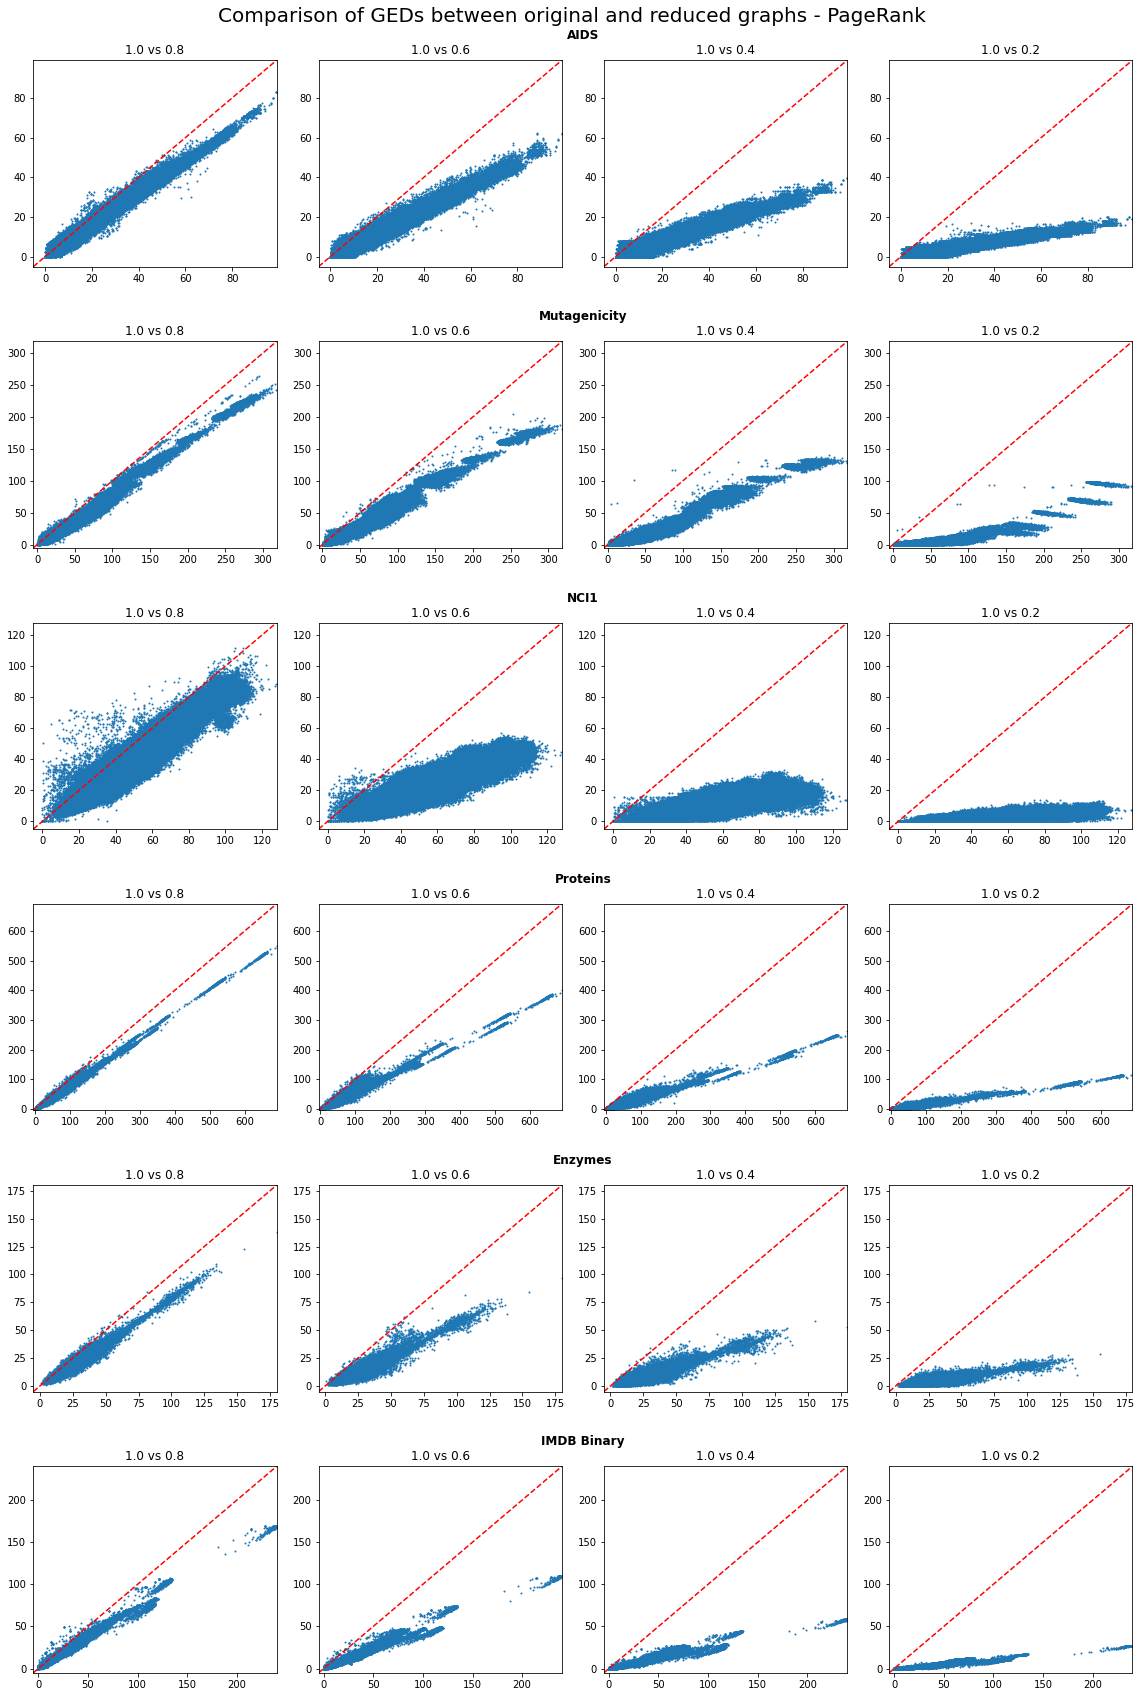

In [100]:
datasets = ['AIDS', 'mutagenicity', 'NCI1', 'proteins_tu', 'enzymes', 'IMDB_binary']
centrality_measure = 'pagerank'
lambdas = ['0.8', '0.6', '0.4', '0.2']


rows, cols = len(datasets), len(lambdas)

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 4*rows))

grid = plt.GridSpec(rows, cols)

for ((idx, dataset), axes) in zip(enumerate(datasets), axs):
    folder = f'./{dataset}/distances'
    
    dist_100 = np.load(f'{folder}/{centrality_measure}_dist_1.0.npy')
    dist_100.flatten()
    max_100 = round(np.amax(dist_100))

    x = dist_100
    if dataset == 'proteins_tu':
        dataset = 'proteins'
    elif dataset == 'IMDB_binary':
        dataset = 'IMDB Binary'
        
    dataset = dataset[0].capitalize() + dataset[1:]
    
    title = f'{dataset}'
    create_subtitle(fig, grid[idx, ::], title)
    
    for lambda_, ax in zip(lambdas, axes):
       
        dist_comparison = np.load(f'{folder}/{centrality_measure}_dist_{lambda_}.npy')
        dist_comparison.flatten()
        max_comparison = round(np.amax(dist_comparison))
    
        ax.set_title(f'1.0 vs {lambda_}')

        y = dist_comparison
        
        ax.scatter(x.flatten(), y.flatten(), s=1)
    
        transform = ax.transAxes
        line = mlines.Line2D([0, 1], [0, 1], color='red', linestyle='--')
        line.set_transform(transform)
        ax.add_line(line)
    
        ax.set(xlim=(-5, max(max_100, max_comparison)),
               ylim=(-5, max(max_100, max_comparison)))

fig.suptitle(f'Comparison of GEDs between original and reduced graphs - PageRank', fontsize=20)
fig.tight_layout()
fig.savefig(f'./scatter_all_{centrality_measure}.png')

AIDS - Comparison of GEDs between original and reduced graphs
lambda: 0.8
30060 375000 8.02
lambda: 0.6
14211 375000 3.79
lambda: 0.4
7401 375000 1.97
lambda: 0.2
1941 375000 0.52
mutagenicity - Comparison of GEDs between original and reduced graphs
lambda: 0.8
13744 3505500 0.39
lambda: 0.6
2254 3505500 0.06
lambda: 0.4
93 3505500 0.0
lambda: 0.2
7 3505500 0.0
NCI1 - Comparison of GEDs between original and reduced graphs
lambda: 0.8
44190 3165000 1.4
lambda: 0.6
428 3165000 0.01
lambda: 0.4
82 3165000 0.0
lambda: 0.2
1 3165000 0.0
proteins_tu - Comparison of GEDs between original and reduced graphs
lambda: 0.8
2625 153780 1.71
lambda: 0.6
661 153780 0.43
lambda: 0.4
147 153780 0.1
lambda: 0.2
103 153780 0.07
enzymes - Comparison of GEDs between original and reduced graphs
lambda: 0.8
974 43200 2.25
lambda: 0.6
102 43200 0.24
lambda: 0.4
37 43200 0.09
lambda: 0.2
1 43200 0.0
IMDB_binary - Comparison of GEDs between original and reduced graphs
lambda: 0.8
8293 120000 6.91
lambda: 0.6
14

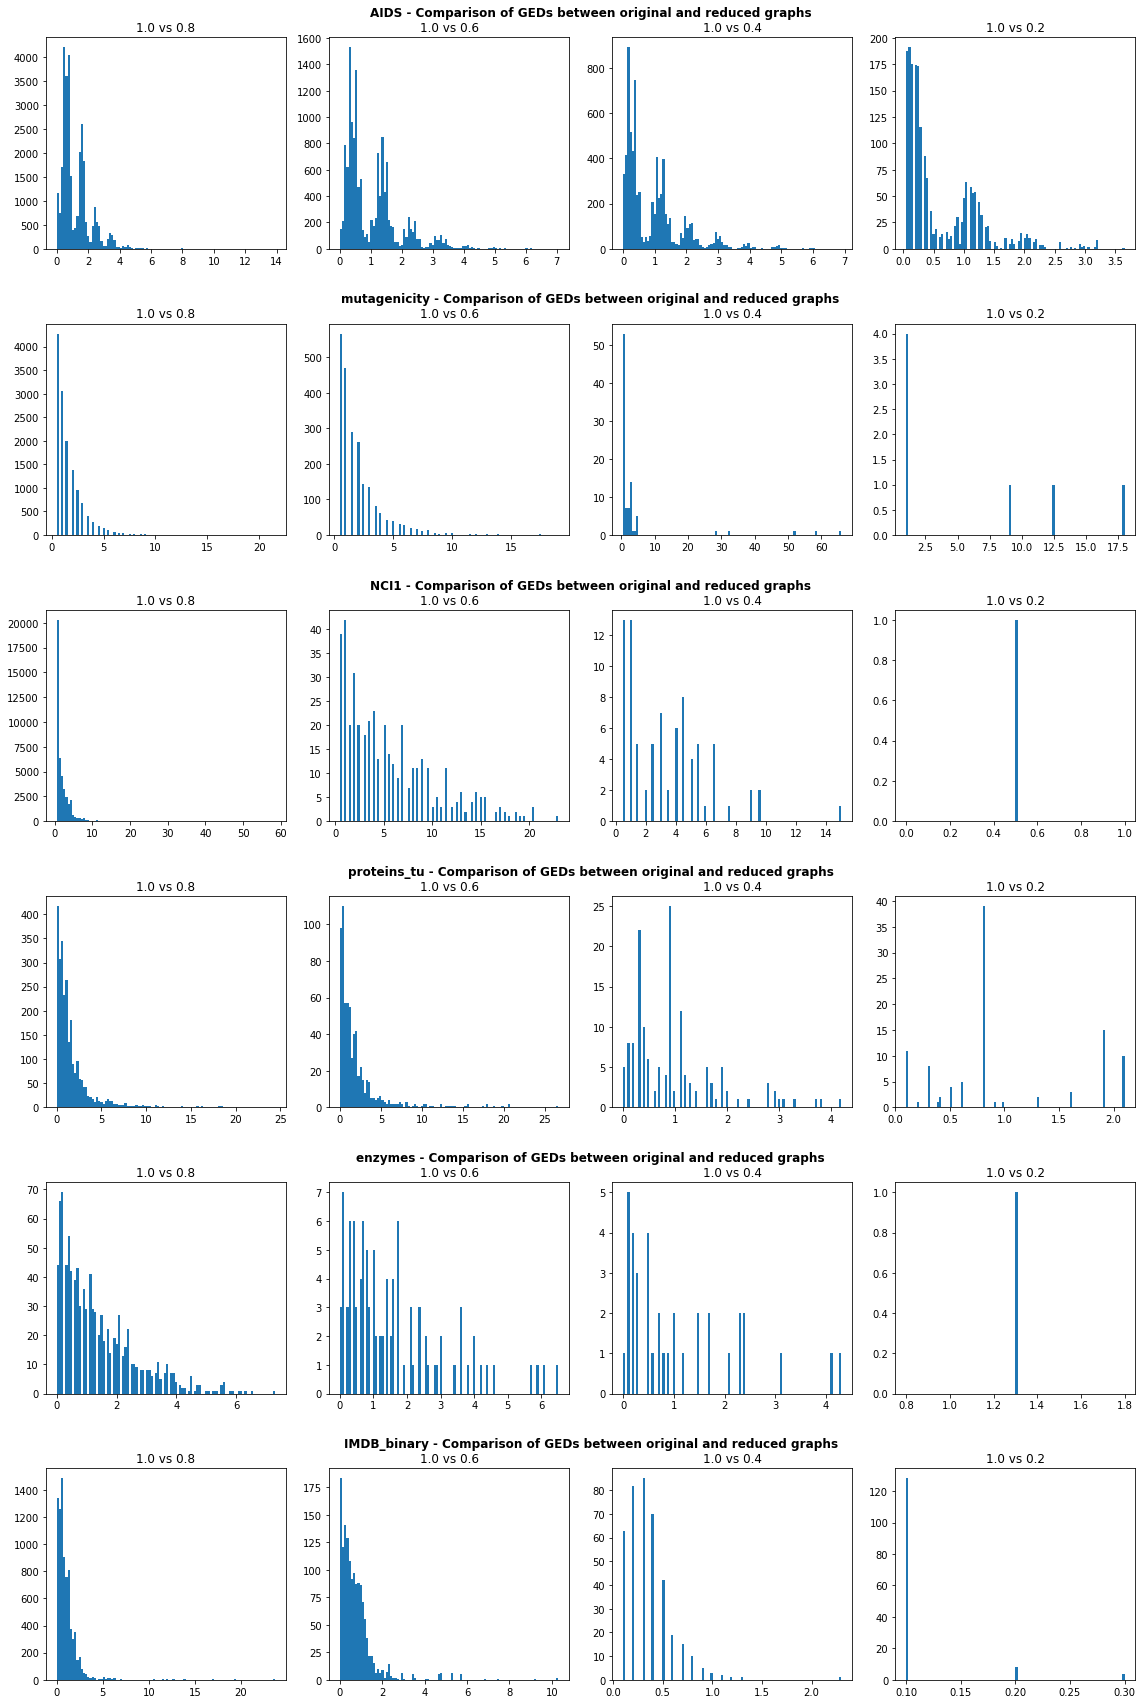

In [63]:
datasets = ['AIDS', 'mutagenicity', 'NCI1', 'proteins_tu', 'enzymes', 'IMDB_binary']
centrality_measure = 'pagerank'
lambdas = ['0.8', '0.6', '0.4', '0.2']


rows, cols = len(datasets), len(lambdas)

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 4*rows))

grid = plt.GridSpec(rows, cols)

for ((idx, dataset), axes) in zip(enumerate(datasets), axs):
    folder = f'./{dataset}/distances'
    
    dist_100 = np.load(f'{folder}/{centrality_measure}_dist_1.0.npy')
    dist_100.flatten()
    max_100 = round(np.amax(dist_100))

    x = dist_100
    
    title = f'{dataset} - Comparison of GEDs between original and reduced graphs'
    create_subtitle(fig, grid[idx, ::], title)
    print(title)
    
    for lambda_, ax in zip(lambdas, axes):
       
        dist_comparison = np.load(f'{folder}/{centrality_measure}_dist_{lambda_}.npy')
        dist_comparison.flatten()
        max_comparison = round(np.amax(dist_comparison))
        
        
        ax_title = f'1.0 vs {lambda_}'
        ax.set_title(ax_title)

        y = dist_comparison
        
        print(f'lambda: {lambda_}')

        counter = 0
        max_val = float('-inf')
        diffs = []
        for idx, (x_row, y_row) in enumerate(zip(x, y)):
            for idx_col, (x_v, y_v) in enumerate(zip(x_row, y_row)):
                
                diff_val = y_v - x_v
                if diff_val > 0:
                    diffs.append(diff_val)
                    
                if diff_val > max_val and diff_val > 0:
                    max_val = diff_val
#                     print('#####')
#                     print(max_val)
#                     print(idx, idx_col, x_v, y_v)
                if x_v < y_v:
#                 print(idx, x_v, y_v)
                    counter += 1
    
        print(counter, len(x.flatten()), round(100 * counter / len(x.flatten()), 2))
        ax.hist(diffs, bins=100)
#     print(diffs)
fig.tight_layout()

AIDS - Comparison of GEDs between original and reduced graphs
lambda: 0.8
30060 375000 8.02
lambda: 0.6
14211 375000 3.79
lambda: 0.4
7401 375000 1.97
lambda: 0.2
1941 375000 0.52
mutagenicity - Comparison of GEDs between original and reduced graphs
lambda: 0.8
13744 3505500 0.39
lambda: 0.6
2254 3505500 0.06
lambda: 0.4
93 3505500 0.0
lambda: 0.2
7 3505500 0.0
NCI1 - Comparison of GEDs between original and reduced graphs
lambda: 0.8
44190 3165000 1.4
lambda: 0.6
428 3165000 0.01
lambda: 0.4
82 3165000 0.0
lambda: 0.2
1 3165000 0.0
proteins_tu - Comparison of GEDs between original and reduced graphs
lambda: 0.8
2625 153780 1.71
lambda: 0.6
661 153780 0.43
lambda: 0.4
147 153780 0.1
lambda: 0.2
103 153780 0.07
enzymes - Comparison of GEDs between original and reduced graphs
lambda: 0.8
974 43200 2.25
lambda: 0.6
102 43200 0.24
lambda: 0.4
37 43200 0.09
lambda: 0.2
1 43200 0.0
IMDB_binary - Comparison of GEDs between original and reduced graphs
lambda: 0.8
8293 120000 6.91
lambda: 0.6
14

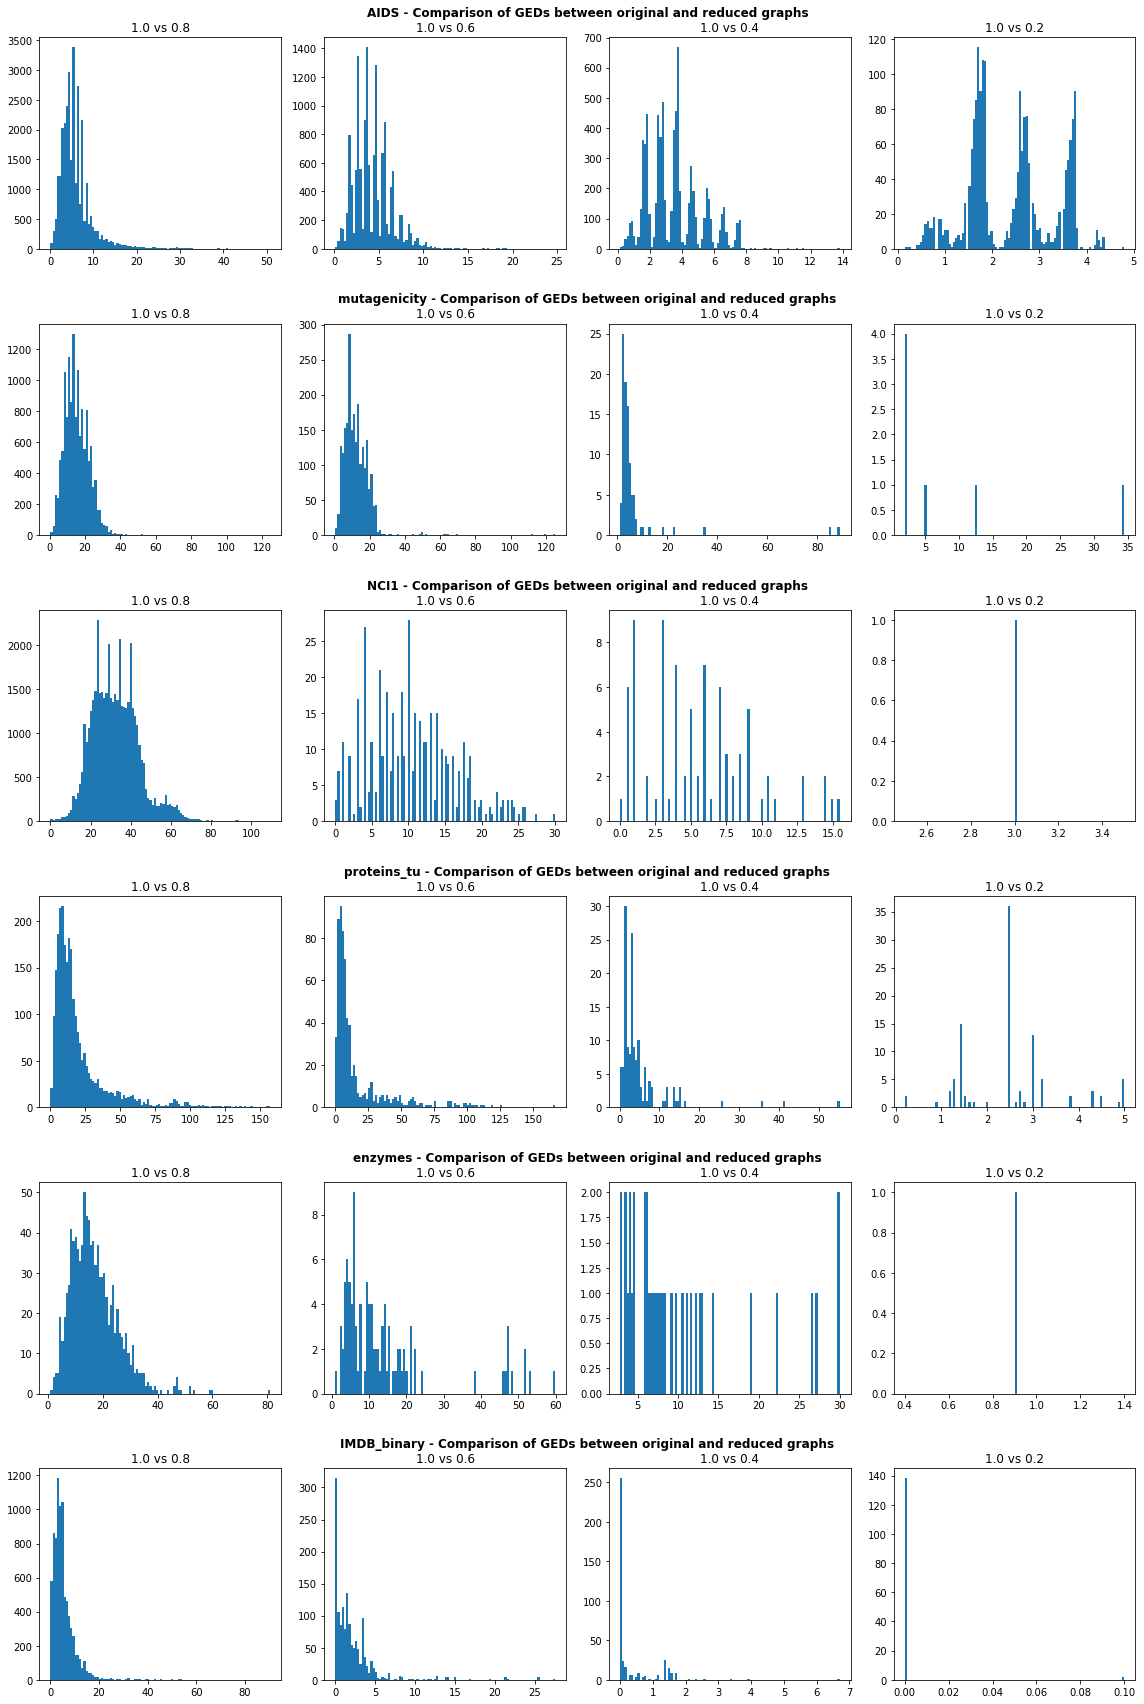

In [64]:
datasets = ['AIDS', 'mutagenicity', 'NCI1', 'proteins_tu', 'enzymes', 'IMDB_binary']
centrality_measure = 'pagerank'
lambdas = ['0.8', '0.6', '0.4', '0.2']


rows, cols = len(datasets), len(lambdas)

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 4*rows))

grid = plt.GridSpec(rows, cols)

for ((idx, dataset), axes) in zip(enumerate(datasets), axs):
    folder = f'./{dataset}/distances'
    
    dist_100 = np.load(f'{folder}/{centrality_measure}_dist_1.0.npy')
    dist_100.flatten()
    max_100 = round(np.amax(dist_100))

    x = dist_100
    
    title = f'{dataset} - Comparison of GEDs between original and reduced graphs'
    create_subtitle(fig, grid[idx, ::], title)
    print(title)
    
    for lambda_, ax in zip(lambdas, axes):
       
        dist_comparison = np.load(f'{folder}/{centrality_measure}_dist_{lambda_}.npy')
        dist_comparison.flatten()
        max_comparison = round(np.amax(dist_comparison))
        
        
        ax_title = f'1.0 vs {lambda_}'
        ax.set_title(ax_title)

        y = dist_comparison
        
#         print(f'lambda: {lambda_}')

        counter = 0
        max_val = float('-inf')
        diffs = []
        for idx, (x_row, y_row) in enumerate(zip(x, y)):
            for idx_col, (x_v, y_v) in enumerate(zip(x_row, y_row)):
                
                diff_val = y_v - x_v
                if diff_val > 0:
                    diffs.append(x_v)
                    
                if x_v < y_v:
                    counter += 1
    
#         print(counter, len(x.flatten()), round(100 * counter / len(x.flatten()), 2))
        ax.hist(diffs, bins=100)
#     print(diffs)
fig.tight_layout()

In [94]:
datasets = ['AIDS', 'mutagenicity', 'NCI1', 'proteins_tu', 'enzymes', 'IMDB_binary']

confidence = 0.95

for dataset in datasets:
    filename = f'./{dataset}/time.csv'
    
    df = pd.read_csv(filename)
    df.drop(columns=df.columns[0],
           axis=1,
           inplace=True)
#     df = df.iloc[:, ::-1]
    
    
    head = [float(val) for val in df.head(0).columns]
#     print(head)
    
    computation_times = np.array(df.values)
    num_samples, _ = computation_times.shape
    
    computation_times_AVERAGE = np.average(computation_times, axis=0)
    computation_times_STDEV = np.std(computation_times, axis=0, ddof=1)
    coeff = st.t.ppf((1 + confidence) / 2., num_samples-1)
    
    computation_times_CONF_INT = coeff * computation_times_STDEV / np.sqrt(num_samples)

# #     print(df)
#     print(computation_times_AVERAGE)
#     print(computation_times_STDEV)
#     print(computation_times_CONF_INT)
#     fig, ax = plt.subplots()
#     x = head
#     y = computation_times_AVERAGE
#     y_err = computation_times_CONF_INT
    
#     ax.plot(head, computation_times_AVERAGE, '-')
#     ax.fill_between(x, y - y_err, y + y_err, alpha=0.2)
#     ax.plot(x, y, 'o', color='tab:blue')
    if dataset == 'proteins_tu':
        dataset = 'proteins'
    elif dataset == 'IMDB_binary':
        dataset = 'IMDB Binary'
        
    dataset = dataset[0].capitalize() + dataset[1:]
    sep = '$\pm$'
    print(f'& {dataset} & {" & ".join([str(round(mean, 2)) + sep + str(round(conf, 2)) for mean, conf in zip(computation_times_AVERAGE, computation_times_CONF_INT)])} \\\\')
#     print('########################')

    

& AIDS & 9.93$\pm$0.25 & 7.25$\pm$0.3 & 5.59$\pm$0.13 & 4.0$\pm$0.13 & 2.78$\pm$0.21 \\
& Mutagenicity & 63.27$\pm$1.62 & 46.08$\pm$1.55 & 33.23$\pm$0.95 & 21.91$\pm$0.55 & 15.18$\pm$0.72 \\
& NCI1 & 51.41$\pm$1.1 & 36.72$\pm$0.95 & 25.85$\pm$0.71 & 17.89$\pm$0.68 & 12.62$\pm$0.88 \\
& Proteins & 7.09$\pm$0.37 & 4.67$\pm$0.25 & 3.09$\pm$0.16 & 2.02$\pm$0.21 & 1.18$\pm$0.24 \\
& Enzymes & 2.18$\pm$0.1 & 1.41$\pm$0.1 & 1.11$\pm$0.14 & 0.61$\pm$0.04 & 0.35$\pm$0.05 \\
& IMDB Binary & 4.32$\pm$0.15 & 2.91$\pm$0.23 & 1.94$\pm$0.21 & 1.08$\pm$0.13 & 0.61$\pm$0.11 \\


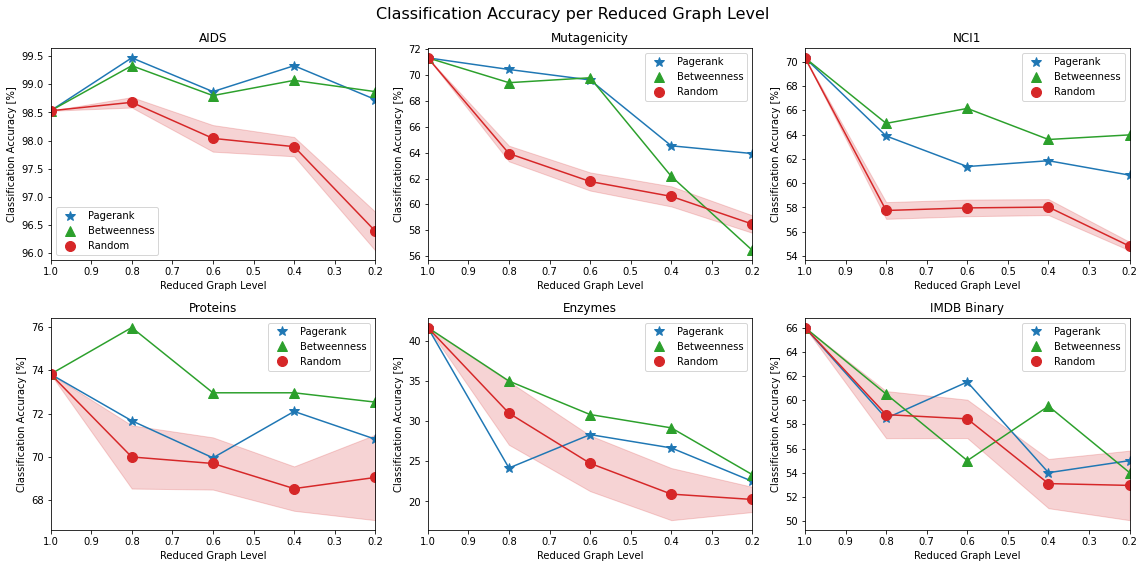

In [102]:
datasets = ['AIDS', 'mutagenicity', 'NCI1', 'proteins_tu', 'enzymes', 'IMDB_binary']
raw_data = [
        [[98.53, 99.47, 98.87, 99.33, 98.73], [98.53, 99.33, 98.8,  99.07, 98.87]],
        [[71.33, 70.43, 69.62, 64.53, 63.93], [71.33, 69.41, 69.79, 62.17, 56.44]],
        [[70.33, 63.89, 61.37, 61.85, 60.66], [70.33, 64.93, 66.16, 63.6,  63.98]],
        [[73.82, 71.67, 69.96, 72.1,  70.82], [73.82, 75.97, 72.96, 72.96, 72.53]],
        [[41.67, 24.17, 28.33, 26.67, 22.5 ], [41.67, 35.,   30.83, 29.17, 23.33]],
        [[66,    58.5,  61.5,  54.,   55.  ], [66,    60.5,  55,    59.5,  54.  ]]
       ]
centrality_measures = ['Pagerank', 'Betweenness', 'Random']

confidence = 0.95

rows, cols = 2, 3

fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(16, 4*rows))

grid = plt.GridSpec(rows, cols)


for idx, (dataset, data, axes) in enumerate(zip(datasets, raw_data, axs.flatten())):
    pagerank_data, betweenness_data = data
    acc_full_graph = pagerank_data[0]
    
    filename = f'./{dataset}/random_values.csv'
    
    df = pd.read_csv(filename)
    df.drop(columns=df.columns[0],
           axis=1,
           inplace=True)

    df.insert(loc=0, column=1.0, value=[acc_full_graph for _ in range(len(df.index))])
    head = [float(val) for val in df.head(0).columns]

    
    random_acc = np.array(df.values)
    num_samples, _ = random_acc.shape
    
    random_acc_AVERAGE = np.average(random_acc, axis=0)
    random_acc_STDEV = np.std(random_acc, axis=0, ddof=1)
    coeff = st.t.ppf((1 + confidence) / 2., num_samples-1)
    
    random_acc_CONF_INT = coeff * random_acc_STDEV / np.sqrt(num_samples)
    
#     title = dataset
#     create_subtitle(fig, grid[idx, ::], title)

#     print(random_acc_CONF_INT)
#     fig, ax = plt.subplots()
    title = f'{dataset} - Classification Accuracy per Reduced Graph Space'
    
    if dataset == 'proteins_tu':
        dataset = 'proteins'
    elif dataset == 'IMDB_binary':
        dataset = 'IMDB Binary'
        
    dataset = dataset[0].capitalize() + dataset[1:]
    
    axes.set_title(dataset)
    axes.set_xlim(1.0, 0.2)
    axes.set_ylabel('Classification Accuracy [%]')
    axes.set_xlabel('Reduced Graph Level')
    x = head
    y = random_acc_AVERAGE
    y_err = random_acc_CONF_INT
    
    
    axes.plot(x, pagerank_data, '-', color='tab:blue')
    axes.plot(x, pagerank_data, '*', color='tab:blue', markersize=10, label='Pagerank')
    
    axes.plot(x, betweenness_data, '-', color='tab:green')
    axes.plot(x, betweenness_data, '^', color='tab:green', markersize=10, label='Betweenness')
    
    axes.plot(head, random_acc_AVERAGE, '-', color='tab:red')
    axes.fill_between(x, y - y_err, y + y_err, alpha=0.2,color='tab:red')
    axes.plot(x, y, 'o', color='tab:red', markersize=10, label='Random')
    
    axes.legend()


fig.suptitle('Classification Accuracy per Reduced Graph Level', fontsize=16)
fig.tight_layout()
fig.savefig(f'./accuracies.png')